<a href="https://colab.research.google.com/github/ANUJGAUR/Hotel-booking-analysis-project/blob/main/Final_EDA_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

# **Data Preparation and Cleaning.**

The first step is to import the main libraries that we will use for this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir_path = '/content/drive/MyDrive/'
df = pd.read_csv(dir_path+'Hotel Bookings.csv')#Loading Data Set

Getting basic information about data set.

In [4]:
df.head()# Top 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()#Finding data types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df1 = df.copy() #Copy of dataframe
df1.shape #Finding rows and columns

(119390, 32)

In [7]:
df1.columns # List of columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **Cleaning dataset**

STEP 1 : Removed duplicates.

In [8]:
df[df1.duplicated()].shape # Finding duplicates rows

(31994, 32)

In [9]:
df1.drop_duplicates(inplace=True) # Removing duplicates rows

In [10]:
df1.shape # Checking duplicate rows removed or not

(87396, 32)

STEP 2 : Replace Null values.

In [11]:
df1.isnull().sum().sort_values(ascending=False)[:5] # Finding null values 

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [12]:
df1['children'].unique() # Checking unique values

array([ 0.,  1.,  2., 10.,  3., nan])

In [13]:
df1['children'].fillna(df1['children'].mean(),inplace = True) # Replacing null values with the mean of children 

In [14]:
df1['country'].fillna('others',inplace = True) # Replacing country null values with others

In [15]:
df1['company'].fillna(0,inplace = True) # Replacing country null values with zero

In [16]:
df1['agent'].fillna(0,inplace = True) # Replacing country null values with zero

In [17]:
df1.isnull().sum().sort_values(ascending=False)[:5] # Again checking null values 

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [18]:
df1[df1['children']+df1['adults']+df1['babies'] == 0].shape # Checking Booking without people

(166, 32)

In [19]:
df1.drop(df1.index[df1['adults']+df1['children']+df1['babies'] == 0],inplace = True) # Removing booking without people

STEP 3 : Change Datatype of columns.

In [20]:
df1[['children','company','agent']] = df1[['children','company','agent']].astype(int) # Changing children, company and agent columns data type into integer

In [21]:
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date']) #Changing reservation_status_date column data type into datetime

STEP 4 : Add columns.

In [22]:
df1['total_stay_time'] = df1['stays_in_week_nights'] + df1['stays_in_weekend_nights'] # Adding new column as total_stay_time

In [23]:
df1['total_people'] = df1['adults'] + df1['children'] + df1['babies'] # Adding new column as total_people

In [24]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay_time,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [25]:
df1.info() # Checking information of data set after cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  b

# **1. In which year hotels has the maximum profit?**

In [26]:
df1[['lead_time','adults','children','adr','agent','hotel']][df['children']==1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,lead_time,adults,children,adr,agent,hotel
13,18,2,1,154.77,241,Resort Hotel
87,79,2,1,108.73,242,Resort Hotel
98,101,2,1,99.30,240,Resort Hotel
118,79,2,1,149.00,250,Resort Hotel
143,109,2,1,85.59,241,Resort Hotel
...,...,...,...,...,...,...
119162,171,2,1,180.00,14,City Hotel
119228,341,2,1,96.91,22,City Hotel
119270,0,2,1,135.00,9,City Hotel
119287,167,2,1,177.75,9,City Hotel


In [27]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [28]:
Highest_profitable_year=pd.DataFrame(df1.groupby(['arrival_date_year']).agg({'adr':'sum'}).sort_values(by='adr',ascending=False)).reset_index()
Highest_profitable_year

,arrival_date_year,adr
0,2016,4303105.84
1,2017,3761531.89
2,2015,1226930.09


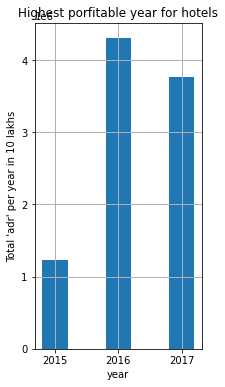

In [29]:
plt.rcParams['figure.figsize'] = (3, 6)
A=Highest_profitable_year['arrival_date_year']
B=Highest_profitable_year['adr']
plt.bar(A,B,width=.4)
plt.grid(linestyle ='-',linewidth =1)
plt.xlabel("year")
plt.ylabel("Total 'adr' per year in 10 lakhs")
plt.title("Highest porfitable year for hotels")
plt.show()

In [30]:
No_of_Bookings=df1.groupby('arrival_date_year').size().reset_index(name='booking_no')
No_of_Bookings

,arrival_date_year,booking_no
0,2015,13284
1,2016,42313
2,2017,31633


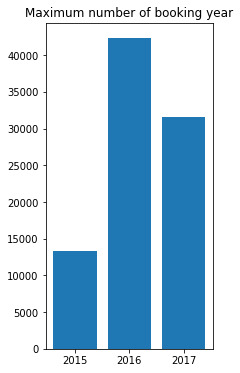

In [31]:
plt.rcParams['figure.figsize'] = (3, 6)
plt.bar(No_of_Bookings['arrival_date_year'],No_of_Bookings['booking_no'])
plt.title("Maximum number of booking year")
plt.show()

# **2. In which month of the year 2015 , hotels has the maximum number of bookings ?**

In [32]:
a=df1.groupby(['arrival_date_year','arrival_date_month']).size().reset_index(name='booking_no')

In [33]:
No_booking_15=a[['arrival_date_year','arrival_date_month','booking_no']][a['arrival_date_year']==2015]
No_booking_15

,arrival_date_year,arrival_date_month,booking_no
0,2015,August,2447
1,2015,December,1975
2,2015,July,1672
3,2015,November,1662
4,2015,October,2694
5,2015,September,2834


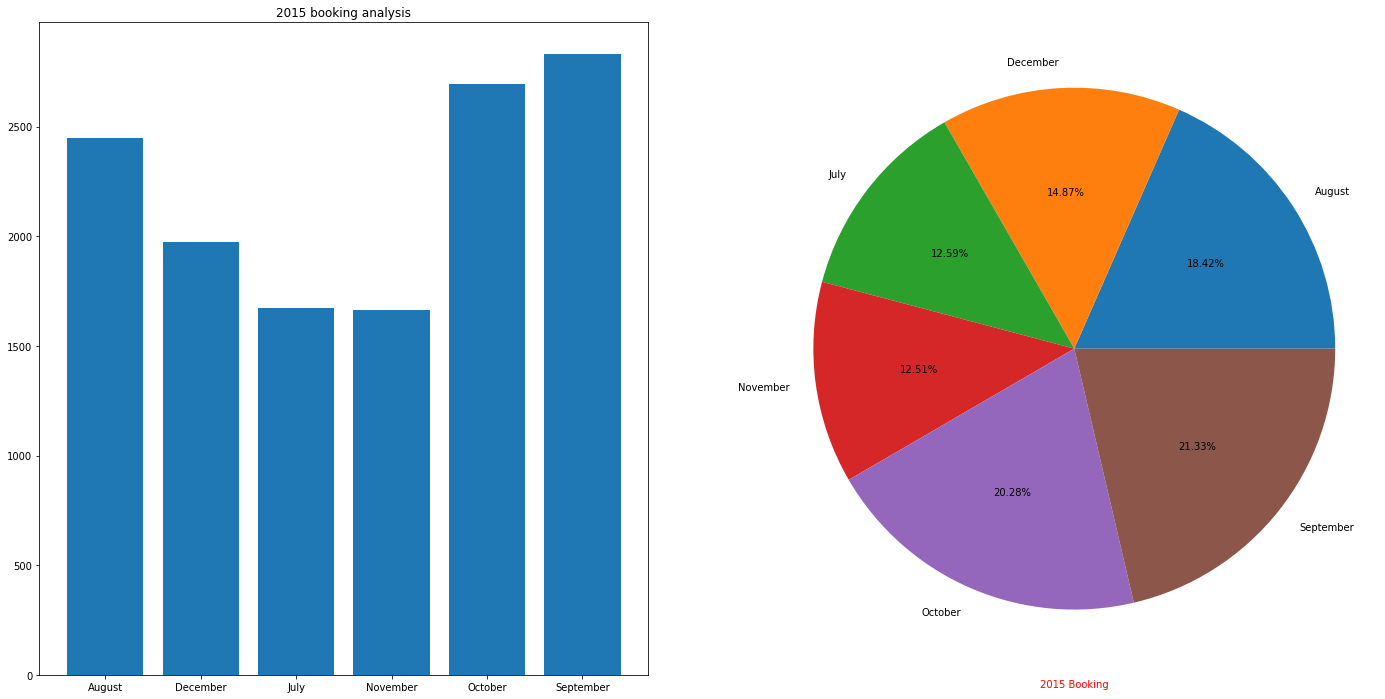

In [34]:
plt.rcParams['figure.figsize'] = (24,12)

plt.subplot(1,2,1)
plt.bar(No_booking_15['arrival_date_month'],No_booking_15['booking_no'])
plt.title('2015 booking analysis')

plt.subplot(1,2,2)
plt.axis('equal')
label=No_booking_15['arrival_date_month']
size=(No_booking_15['booking_no']/No_booking_15['booking_no'].sum())*100
plt.pie(size,labels=label,radius=1,autopct='%0.2f%%')
plt.xlabel('2015 Booking',c='r')

plt.show()

# **3. In which month of the year 2016 , hotels has the maximum number of bookings ?**


In [35]:
No_booking_16=a[['arrival_date_year','arrival_date_month','booking_no']][a['arrival_date_year']==2016]
No_booking_16

,arrival_date_year,arrival_date_month,booking_no
6,2016,April,3767
7,2016,August,4415
8,2016,December,3137
9,2016,February,2799
10,2016,January,1849
11,2016,July,3842
12,2016,June,3515
13,2016,March,3826
14,2016,May,3777
15,2016,November,3311


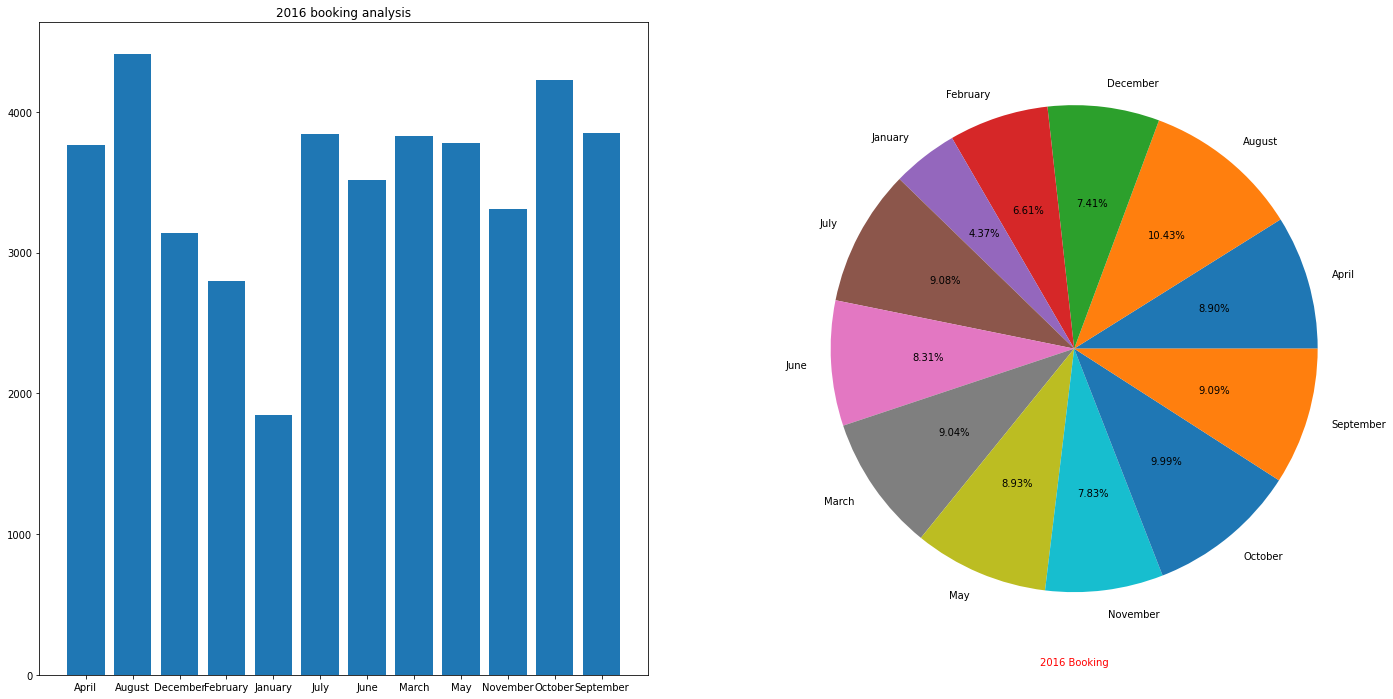

In [36]:
plt.rcParams['figure.figsize'] = (24,12)

plt.subplot(1,2,1)
plt.bar(No_booking_16['arrival_date_month'],No_booking_16['booking_no'])
plt.title('2016 booking analysis')

plt.subplot(1,2,2)
label=No_booking_16['arrival_date_month']
size=(No_booking_16['booking_no']/No_booking_15['booking_no'].sum())*100
plt.pie(size,labels=label,radius=1,autopct='%0.2f%%')
plt.xlabel('2016 Booking',c='r')

plt.show()

# **4. In which month of the year 2017 , hotels has the maximum number of bookings ?**

In [37]:
No_booking_17=a[['arrival_date_year','arrival_date_month','booking_no']][a['arrival_date_year']==2017]
No_booking_17

,arrival_date_year,arrival_date_month,booking_no
18,2017,April,4133
19,2017,August,4380
20,2017,February,3284
21,2017,January,2836
22,2017,July,4529
23,2017,June,4241
24,2017,March,3663
25,2017,May,4567


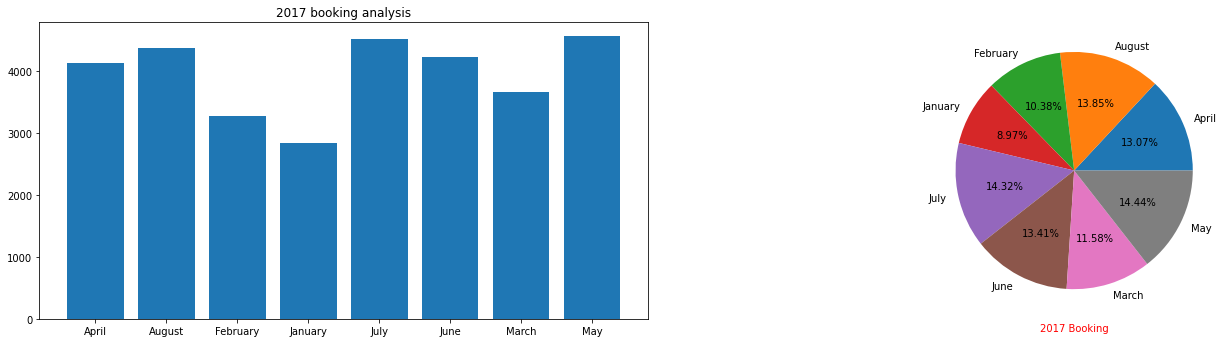

In [38]:
plt.rcParams['figure.figsize'] = (24,12)

plt.subplot(2,2,1)
plt.bar(No_booking_17['arrival_date_month'],No_booking_17['booking_no'])
plt.title('2017 booking analysis')

plt.subplot(2,2,2)
label=No_booking_17['arrival_date_month']
size=(No_booking_17['booking_no']/No_booking_15['booking_no'].sum())*100
plt.pie(size,labels=label,radius=1,autopct='%0.2f%%')
plt.xlabel('2017 Booking',c='r')

plt.show()

# **5. Which month has the maximum number of bookings in averages of three years ?**

In [39]:
hotel_month = df1.groupby('arrival_date_month').size()
month_in_percentage = ((hotel_month/hotel_month.sum())*100).reset_index(name='month%').sort_values(by='month%',ascending=False)

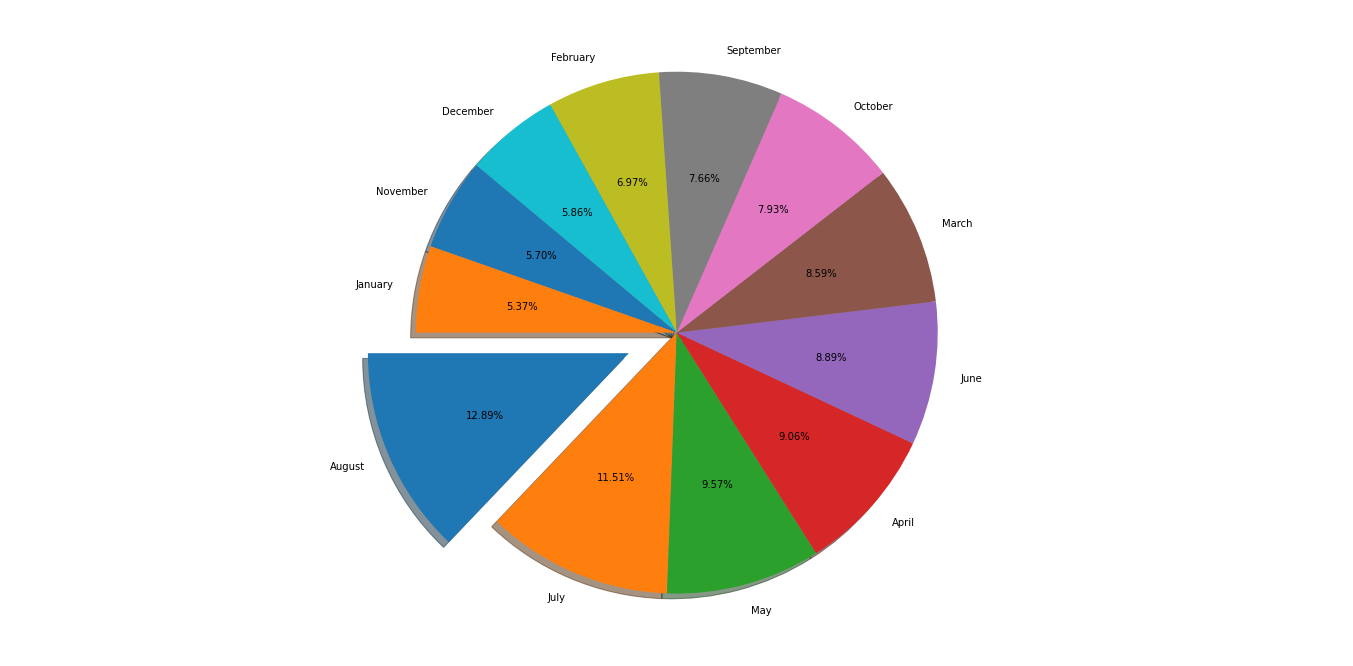

In [40]:
plt.axis('equal')
label = month_in_percentage['arrival_date_month']
size = month_in_percentage['month%']
plt.pie(size,labels=label,autopct='%0.2f%%',startangle=180,shadow=True,explode=[0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.show()

# **6. Hotel wise analysis which month has the maximum number of bookings ?**

In [41]:
city_hotel = df1[df1['hotel']=='City Hotel']
resort_hotel = df1[df1['hotel']=='Resort Hotel']

In [42]:
month_city_hotel = city_hotel.groupby('arrival_date_month').size().sort_values(ascending=False).reset_index(name='city_hotel')
month_resort_hotel = resort_hotel.groupby('arrival_date_month').size().sort_values(ascending=False).reset_index(name='resort_hotel')
hotel_month_count = pd.concat([month_city_hotel,month_resort_hotel],axis=1)
hotel_month_count = hotel_month_count.loc[:,~hotel_month_count.columns.duplicated()].copy()
hotel_month_count = hotel_month_count.set_index(['arrival_date_month'])

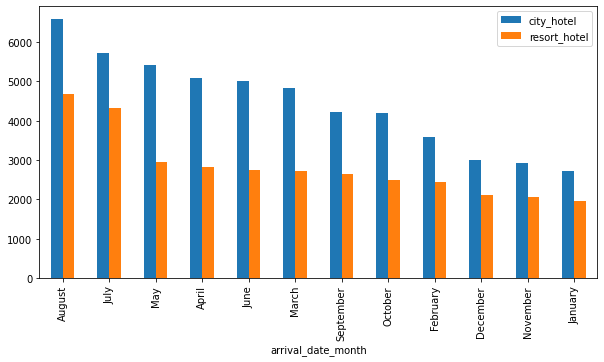

In [43]:
plt.rcParams["figure.figsize"] = (10,5)
hotel_month_count.plot(kind='bar')
plt.show()

# **7. Optimal length of stay to get best daily rate for one person ?**

In [44]:
df1['Total_People']=df1['adults']+df1['children']+df1['babies']
df1['Total_stay_of_days']=df1['stays_in_week_nights']+df1['stays_in_weekend_nights']
Average_1people_stay=df1[['Total_People','adr','Total_stay_of_days']][df1['Total_People']==1][df1['adr']<5000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


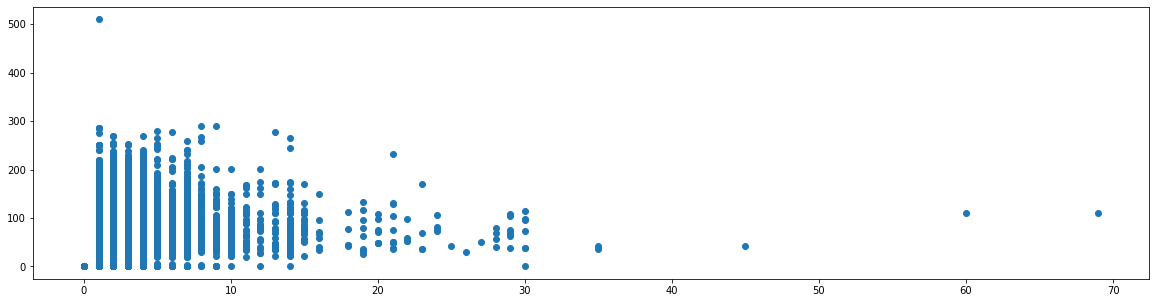

In [45]:
plt.rcParams['figure.figsize'] = (20,5)
plt.scatter(Average_1people_stay['Total_stay_of_days'],Average_1people_stay['adr'])
plt.show()

# **8. Optimal length of stay to get best daily rate for two people ?**

In [46]:
df1['Total_People']=df1['adults']+df1['children']+df1['babies']
df1['Total_stay_of_days']=df1['stays_in_week_nights']+df1['stays_in_weekend_nights']
Average_2people_stay=df1[['Total_People','adr','Total_stay_of_days']][df1['Total_People']==2][df1['adr']<5000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


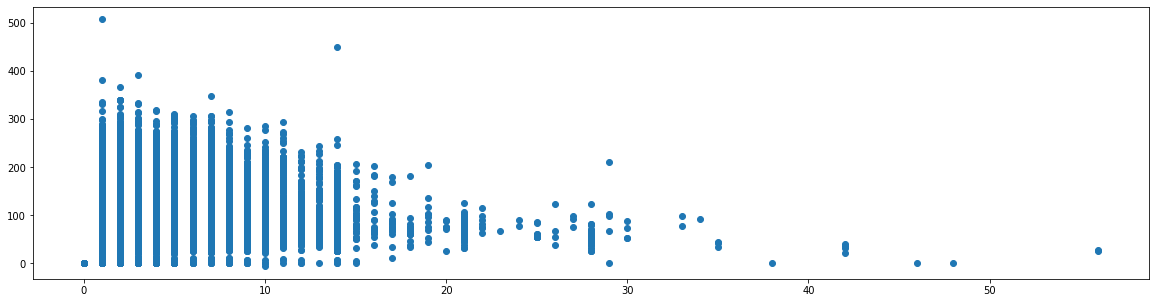

In [47]:
plt.rcParams['figure.figsize'] = (20,5)
plt.scatter(Average_2people_stay['Total_stay_of_days'],Average_2people_stay['adr'])
plt.show()

# **9. Optimal length of stay to get best daily rate for three people ?**

In [48]:
df1['Total_People']=df1['adults']+df1['children']+df1['babies']
df1['Total_stay_of_days']=df1['stays_in_week_nights']+df1['stays_in_weekend_nights']
Average_3people_stay=df1[['Total_People','adr','Total_stay_of_days']][df1['Total_People']==3][df1['adr']<5000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


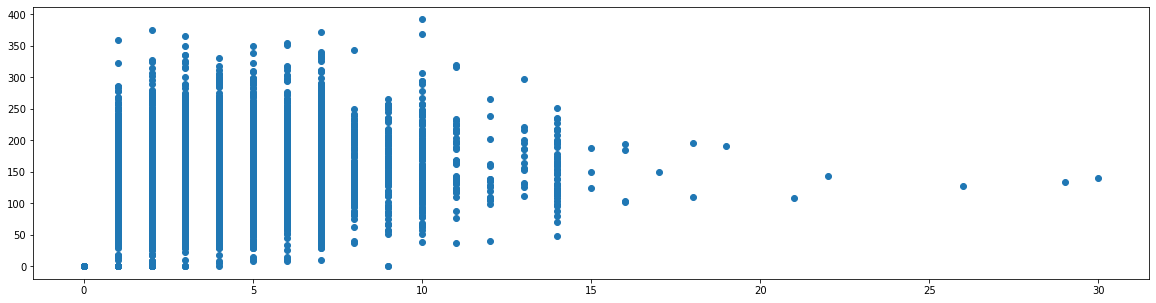

In [49]:
plt.rcParams['figure.figsize'] = (20,5)
plt.scatter(Average_3people_stay['Total_stay_of_days'],Average_3people_stay['adr'])
plt.show()

# **9. Optimal length of stay to get best daily rate considering city hotels for overall bookings ?**

In [50]:
city_hotel.drop(city_hotel[city_hotel['adr'] > 5000].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


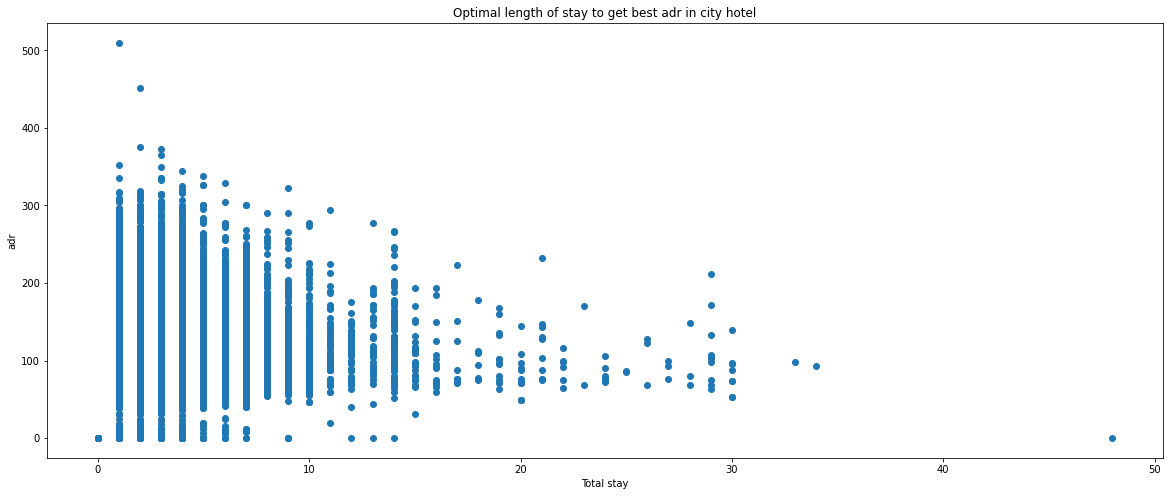

In [51]:
x_label = city_hotel['total_stay_time']
y_label = city_hotel['adr']
plt.rcParams["figure.figsize"] = (20,8)
plt.scatter(x_label,y_label)
plt.gca().update(dict(title='Optimal length of stay to get best adr in city hotel', xlabel='Total stay', ylabel='adr'))
plt.show()

# **10. Optimal length of stay to get best daily rate considering resort hotels for overall bookings ?**

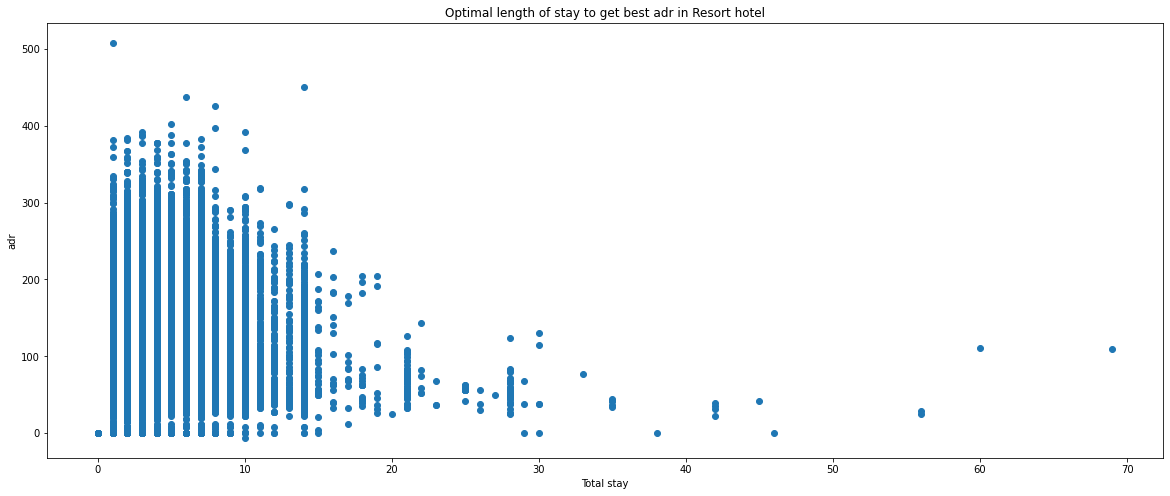

In [52]:
x_label = resort_hotel['total_stay_time']
y_label = resort_hotel['adr']
plt.rcParams["figure.figsize"] = (20,8)
plt.scatter(x_label,y_label)
plt.gca().update(dict(title='Optimal length of stay to get best adr in Resort hotel', xlabel='Total stay', ylabel='adr'))
plt.show()

# **11. Which hotel has recieved the maximum numbers of special requests ?**

In [53]:
hotel_tooked_request=df1[['hotel','total_of_special_requests']][df1['total_of_special_requests']>0]
hotel_tooked_request.groupby('hotel').size().reset_index(name='booking_no')

,hotel,booking_no
0,City Hotel,27008
1,Resort Hotel,16433


In [54]:
hotel_tooked_max_request=df1['hotel'][df1['total_of_special_requests']==df1['total_of_special_requests'].max()]
hotel_tooked_max_request.count()

36

In [55]:
df1['total_of_special_requests'].max()

5

In [56]:
Hotel_tooked_request=df1[['hotel','total_of_special_requests']][df1['total_of_special_requests']>0]

Hotel_request_for_CityHotel=Hotel_tooked_request[Hotel_tooked_request['hotel']=='City Hotel'].groupby('total_of_special_requests').size().reset_index(name='request_no')
Hotel_request_for_ResortHotel=Hotel_tooked_request[Hotel_tooked_request['hotel']=='Resort Hotel'].groupby('total_of_special_requests').size().reset_index(name='request_no')

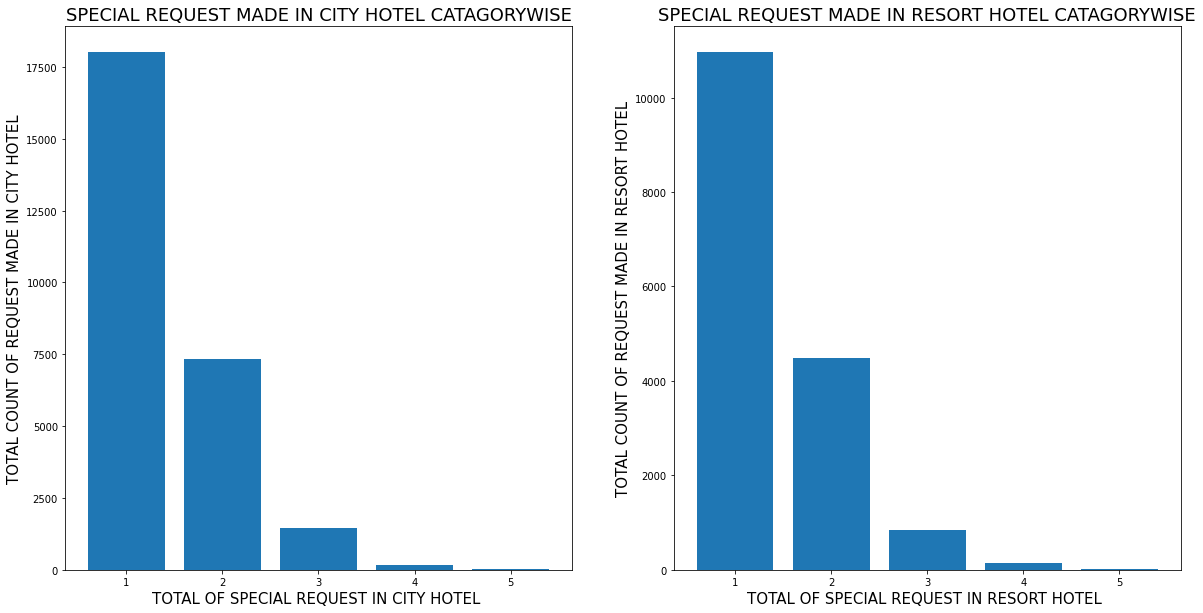

In [57]:
plt.rcParams['figure.figsize'] = (20,10)

plt.subplot(1,2,1)
plt.bar(Hotel_request_for_CityHotel['total_of_special_requests'],Hotel_request_for_CityHotel['request_no'])
plt.title('SPECIAL REQUEST MADE IN CITY HOTEL CATAGORYWISE',FontSize=18)
plt.xlabel('TOTAL OF SPECIAL REQUEST IN CITY HOTEL ',FontSize=15)
plt.ylabel('TOTAL COUNT OF REQUEST MADE IN CITY HOTEL',FontSize=15)

plt.subplot(1,2,2)
plt.bar(Hotel_request_for_ResortHotel['total_of_special_requests'],Hotel_request_for_ResortHotel['request_no'])
plt.title('SPECIAL REQUEST MADE IN RESORT HOTEL CATAGORYWISE',FontSize=18)
plt.xlabel('TOTAL OF SPECIAL REQUEST IN RESORT HOTEL ',FontSize=15)
plt.ylabel('TOTAL COUNT OF REQUEST MADE IN RESORT HOTEL',FontSize=15)

plt.show()

# **12. Hotels Comparison, Which hotel has recieved the maximum numbers of special requests ?**

In [58]:
month_city_hotel = city_hotel.groupby('total_of_special_requests').size().sort_values(ascending=False).reset_index(name='city_hotel')
month_resort_hotel = resort_hotel.groupby('total_of_special_requests').size().sort_values(ascending=False).reset_index(name='resort_hotel')
hotel_month_count = pd.concat([month_city_hotel,month_resort_hotel],axis=1)
hotel_month_count = hotel_month_count.loc[:,~hotel_month_count.columns.duplicated()].copy()
hotel_month_count = hotel_month_count[hotel_month_count['total_of_special_requests'] > 0]
hotel_month_count = hotel_month_count.set_index(['total_of_special_requests'])

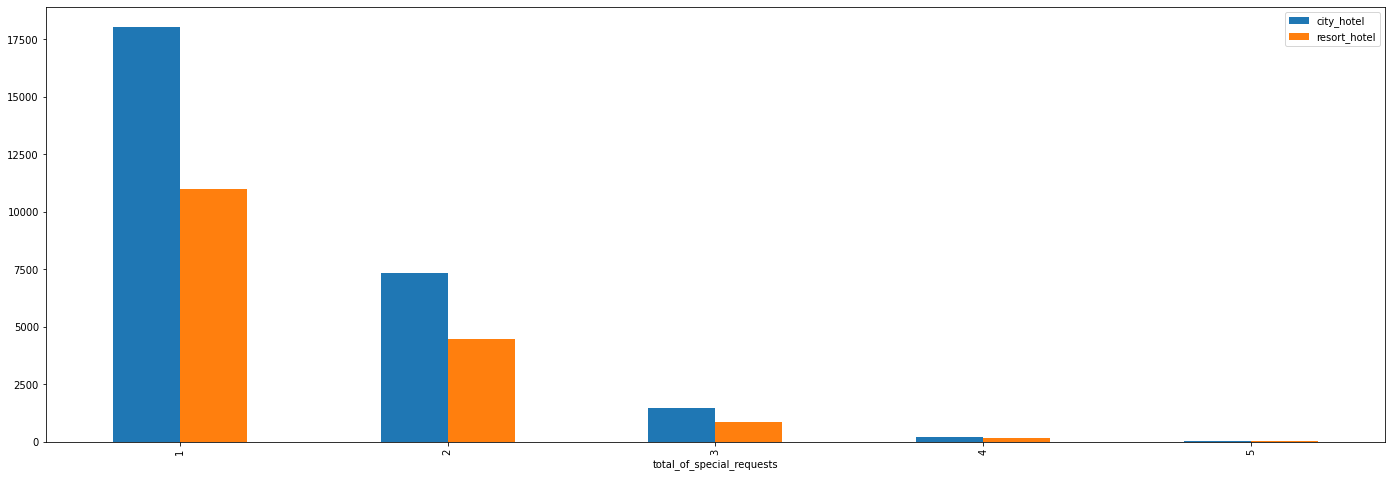

In [59]:
plt.rcParams["figure.figsize"] = (24,8)
hotel_month_count.plot(kind='bar')
plt.show()

In [60]:
df1['total_of_special_requests']

0         0
1         0
2         0
3         0
4         1
         ..
119385    0
119386    2
119387    4
119388    0
119389    2
Name: total_of_special_requests, Length: 87230, dtype: int64

# **12. Which hotel has the maximum number of cancellation requests ?**

In [61]:
meal_city_hotel = city_hotel.groupby('is_canceled').size().sort_values(ascending=False).reset_index(name='city_hotel')
meal_resort_hotel = resort_hotel.groupby('is_canceled').size().sort_values(ascending=False).reset_index(name='resort_hotel')
hotel_month_count = pd.concat([meal_city_hotel,meal_resort_hotel],axis=1)
hotel_month_count = hotel_month_count.loc[:,~hotel_month_count.columns.duplicated()].copy()
hotel_month_count = hotel_month_count.set_index(['is_canceled'])

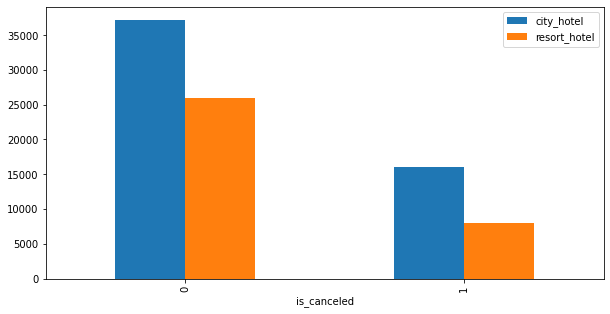

In [62]:
plt.rcParams["figure.figsize"] = (10,5)
hotel_month_count.plot(kind='bar')
plt.show()

# **13.  Which country of residence have made the maximum number of bookings ?**

In [63]:
#Here we are take only top 10 country whose booking is greater then 1000.
hotel_country = df1.groupby('country').size().reset_index(name='counts').sort_values(by='counts',ascending=False)
count_greater_then_1000 = hotel_country[hotel_country['counts'] > 1000][:10]

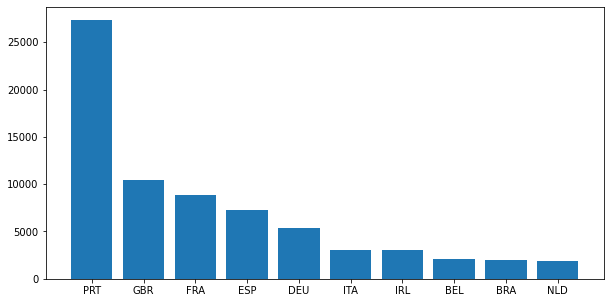

In [64]:
plt.figure(figsize=(10,5))
plt.bar(count_greater_then_1000['country'],count_greater_then_1000['counts'])
plt.show()

# **14. Hotel wise analysis , Which country of residence have made the maximum number of bookings ?**

In [65]:
meal_city_hotel = city_hotel.groupby('country').size().sort_values(ascending=False).reset_index(name='city_hotel')
meal_resort_hotel = resort_hotel.groupby('country').size().sort_values(ascending=False).reset_index(name='resort_hotel')
hotel_month_count = pd.concat([meal_city_hotel,meal_resort_hotel],axis=1)
hotel_month_count = hotel_month_count.loc[:,~hotel_month_count.columns.duplicated()].copy()
hotel_month_count = hotel_month_count.set_index(['country'])
hotel_month_count = hotel_month_count[:10]

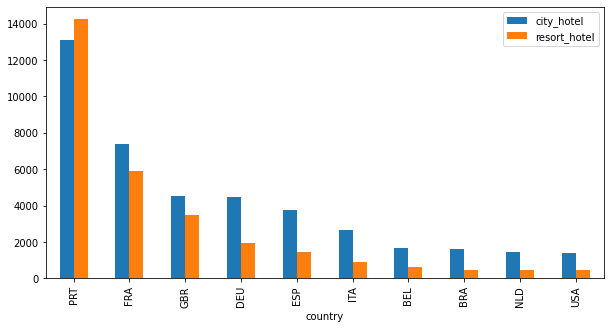

In [66]:
plt.rcParams["figure.figsize"] = (10,5)
hotel_month_count.plot(kind='bar')
plt.show()

# **15. Which hotel are mostly prefered by the guests ?**

In [67]:
hotel_booking = df1.groupby(['hotel']).size()
booking_in_percentage = ((hotel_booking/hotel_booking.sum())*100).reset_index(name='booking%')

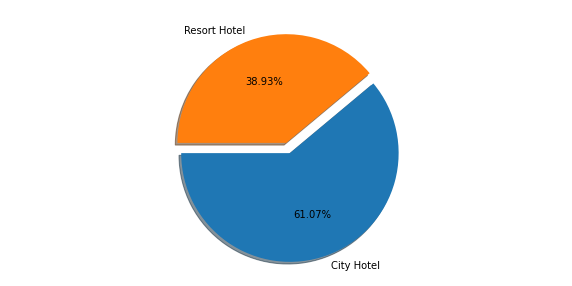

In [68]:
plt.axis('equal')
label = booking_in_percentage['hotel']
size = booking_in_percentage['booking%']
plt.pie(size,labels=label,autopct='%0.2f%%',explode=[0.1,0.0],startangle=180,shadow=True)
plt.show()

# **16. Which meal are mostly prefered by the guests ?**


In [69]:
hotel_meal = df1.groupby('meal').size()
meal_in_percentage = ((hotel_meal/hotel_meal.sum())*100).reset_index(name='meal%').sort_values(by='meal%',ascending=False)

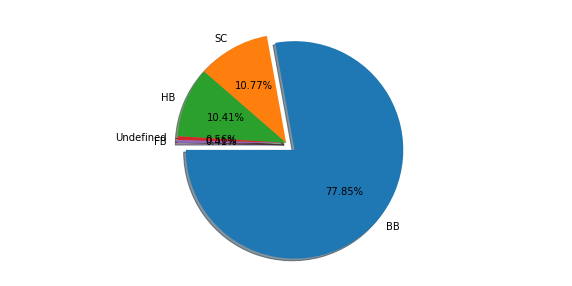

In [70]:
plt.axis('equal')
label = meal_in_percentage['meal']
size = meal_in_percentage['meal%']
plt.pie(size,labels=label,autopct='%0.2f%%',startangle=180,shadow=True,explode=[0.1,0.0,0.0,0.0,0.0])
plt.show()

# **17. How do guests prefer to book hotel ?**

In [71]:
hotel_market = df1.groupby(['market_segment']).size().sort_values(ascending=False)
in_percentage_market = ((hotel_market/hotel_market.sum())*100).reset_index(name='market_segment%')

hotel_distribution = df1.groupby('distribution_channel').size().sort_values(ascending=False)
in_percentage_channel = ((hotel_distribution/hotel_distribution.sum())*100).reset_index(name='distribution_channel%')

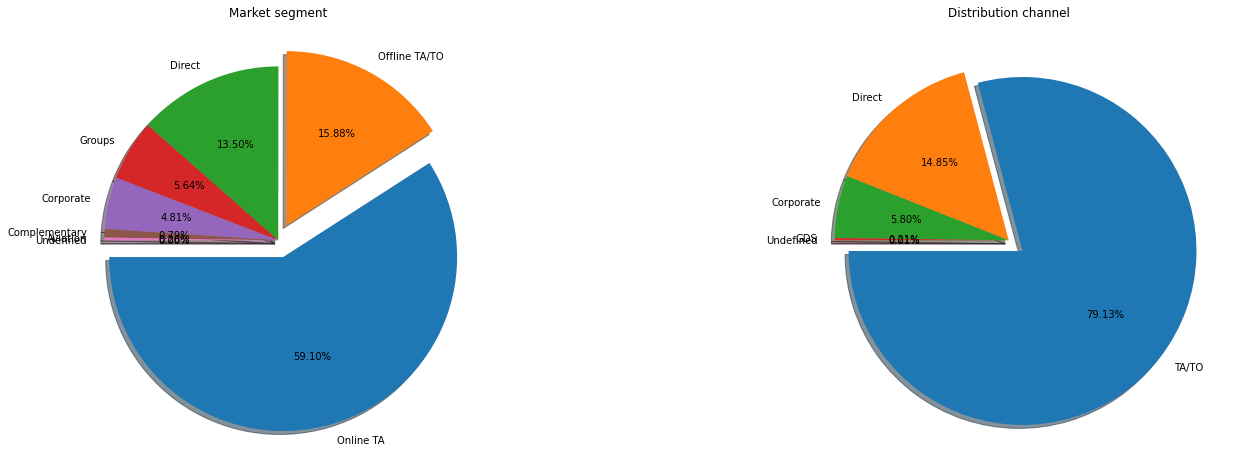

In [72]:
plt.figure(figsize=(24,8))
plt.axis('equal')

label1 = in_percentage_market['market_segment']
size1 = in_percentage_market['market_segment%']
plt.subplot(1,2,1)
plt.pie(size1,labels = label1,radius=1,autopct='%0.2f%%',shadow=True,startangle=180,explode=[0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title('Market segment')

label2 = in_percentage_channel['distribution_channel']
size2 = in_percentage_channel['distribution_channel%']
plt.subplot(1,2,2)
plt.pie(size2,labels = label2,radius=1,autopct='%0.2f%%',shadow=True,startangle=180,explode=[0.1,0.0,0.0,0.0,0.0])
plt.title('Distribution channel')

plt.show()

# **18. Which type of room mostly perefered by the guests ?**

In [73]:
hotel_room = df1.groupby('reserved_room_type').size().sort_values(ascending=False)
in_percentage_hotel_room = ((hotel_room/hotel_room.sum())*100).reset_index(name='room%')

hotel_assigned = df1.groupby('assigned_room_type').size().sort_values(ascending=False)
in_percentage_assigned = ((hotel_assigned/hotel_assigned.sum())*100).reset_index(name='assigned%')

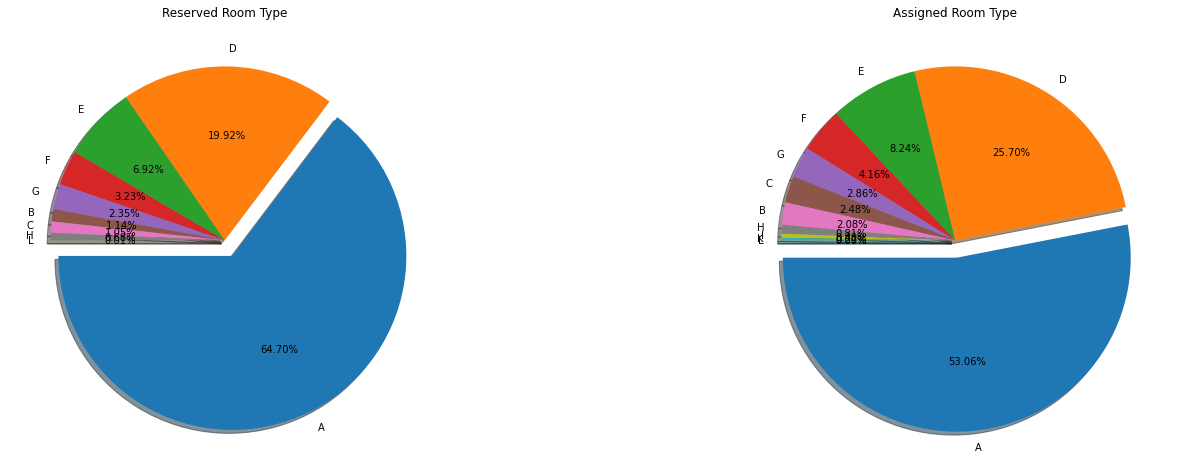

In [74]:
plt.figure(figsize=(24,8))
plt.axis('equal')

label1 = in_percentage_hotel_room['reserved_room_type']
size1 = in_percentage_hotel_room['room%']
plt.subplot(1,2,1)
plt.pie(size1,labels = label1,autopct='%0.2f%%',radius = 1,shadow=True,startangle=180,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title('Reserved Room Type')

label2 = in_percentage_assigned['assigned_room_type']
size2 = in_percentage_assigned['assigned%']
plt.subplot(1,2,2)
plt.pie(size2,labels = label2,autopct='%0.2f%%',radius = 1,shadow=True,startangle=180,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title('Assigned Room Type')

plt.show()

# **19. Which deposite type guests are prefered the most?**

In [75]:
hotel_deposit = df1.groupby('deposit_type').size().sort_values(ascending=False)
in_percentage_deposit = ((hotel_deposit/hotel_deposit.sum())*100).reset_index(name='deposit%')

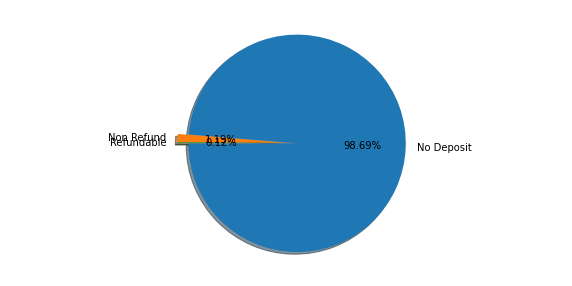

In [76]:
plt.axis('equal')
label = in_percentage_deposit['deposit_type']
size = in_percentage_deposit['deposit%']
plt.pie(size,labels=label,autopct='%0.2f%%',startangle=180,shadow=True,explode=[0.1,0.0,0.0])
plt.show()

# **20. Which type of customer visit the hotel mostly?**

In [77]:
hotel_customer = df1.groupby('customer_type').size().sort_values(ascending=False)
in_percentage_customer = ((hotel_customer/hotel_customer.sum())*100).reset_index(name='customer%')

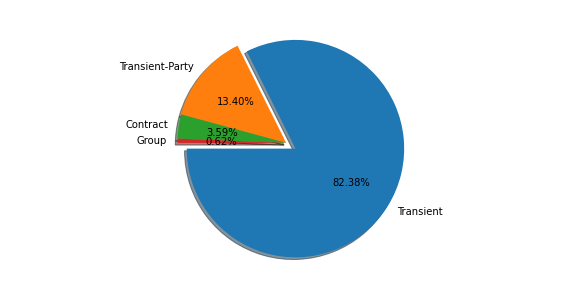

In [78]:
plt.axis('equal')
label = in_percentage_customer['customer_type']
size = in_percentage_customer['customer%']
plt.pie(size,labels = label, autopct='%0.2f%%',startangle=180,shadow=True,explode=[0.1,0.0,0.0,0.0])
plt.show()

# **CONCLUSION**



1.   In 2016 hotels has the maximum profits and also has the highest number of bookings.
2.   In 2015 month of September has the highest number of bookings.
3.   In 2016 month of August has the highest number of bookings.
4.   In 2017 month of May has the highest number of bookings. 
5.   Overall, in the month of August has the highest number of bookings.
6.   On comparison of city hotels and resort hotels , we found that in the month of August city hotels has the maximum number of bookings.
7.   Considering total number of people as 1,2 and 3 as shown in scatter plots , we can conclude that if the optimal length of stay increases , then the adr value get decreases.
8.   If optimal length of stay is >15, then you will get the best average daily rate for city hotels.
9.   If optimal length of stay is >=15, then you will get the best average daily rate for resort hotels.
10.  On comparing the hotels , it is clear that city hotels is supposed to be recieved maximum special requests as compare to the resort hotels.
11.  City hotels has the maximum cancellation requests.
12.  From PRT hotels gets the maximum number of bookings.
13.  On comparing the hotels , it is clear that PRT people likes to book resort hotels.
14.  City hotels are the most prefered by the guests.
15.  BB are the most prefered by the guests.
16.  Online and offline TA/TO are the most prefered by the guests to book a hotel.
17.  Type A room are mostly prefered by the guests.
18.  NO deposit mode are prefered by the guests most.
19.  Transist type guests mostly visit the hotels. 


